<a href="https://colab.research.google.com/github/tamiti-ruet-ece/Multiclass-Bangla-Sentiment-Analysis/blob/main/Helper_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install transformers

In [84]:
import pandas as pd
import seaborn as sns
import re

In [85]:
df1=pd.read_excel('/content/drive/MyDrive/thesis/Multiclass bangla sentiment dataset/CommentsOutputFileEkattorTV.xlsx')
df2=pd.read_excel('/content/drive/MyDrive/thesis/Multiclass bangla sentiment dataset/CommentsOutputFileMagistrate.xlsx')
df3=pd.read_excel('/content/drive/MyDrive/thesis/Multiclass bangla sentiment dataset/CommentsOutputImranHSarker.xlsx')
df = pd.concat([df1, df2,df3], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33012 entries, 0 to 21040
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         33011 non-null  object
 1   Text       33011 non-null  object
 2   Sentiment  6405 non-null   object
dtypes: object(3)
memory usage: 1.0+ MB


In [86]:
df.head()

,ID,Text,Sentiment
0,1050608295011798_1050881064984521,The Desh Bangla 1 hour ago হে মুমিনগণ তোমরা ধৈ...,happy
1,1050608295011798_1051094821629812,অনেকেই অটো লাইক এর কথা শুনেছেন কিন্তু শিখতে পা...,happy
2,1050608295011798_1051014128304548,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,sad
3,1050608295011798_1051021028303858,ছুরি ভ।গ পাইনই,disgust
4,1050608295011798_1051036028302358,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,angry


In [87]:
from sklearn.utils import shuffle
df = shuffle(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


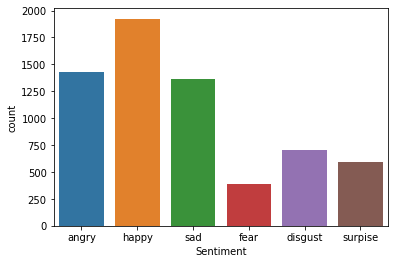

In [88]:
sns.countplot(df['Sentiment'])

In [89]:
df.Sentiment.value_counts(), len(df)

(happy      1924
 angry      1427
 sad        1366
 disgust     704
 surpise     592
 fear        392
 Name: Sentiment, dtype: int64, 33012)

In [90]:
df.shape

(33012, 3)

In [91]:
df = df.dropna(subset=['Sentiment'])

In [92]:
df.shape

(6405, 3)

In [93]:
df.head()

,ID,Text,Sentiment
479,939195189512152_939206382844366,উনারে লাথথায়ে মিরপুর চিড়িয়াখানার প্রধান সিকিউর...,angry
1750,935156429916028_935165096581828,@Mozammel Hoque Shahid: কই এখন আপনি? লেকচার থে...,angry
1855,987743164678331_1529633654011820,সুন্দর জোক্স,happy
1382,935324716565866_935576566540681,বেশির ভাগ ক্ষেত্রে যাত্রী গন কম ভুল করে আর বেশ...,sad
3388,987743164678331_552808888211836,বাংলাদেশের হিন্দু মুসলিম সবাই ভাই ভাই যে অন্যন...,sad


In [94]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"
                           
                                     #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [95]:
df.sample(10)

,ID,Text,Sentiment
4815,987262581393056_987507764701871,"সরকার এর এই দিকে নজর নেই,আমরা নারি দের অধিকার ...",sad
1920,987743164678331_553024668190258,"ইমরান এইচ এর সহযোগি থাবা মগাচিপ, অনন্য আজাদ (চ...",sad
252,939268136171524_939396949491976,"নিরাপত্তার আড়ালে চুরি , চাকরি থেকে অব্যাহতি দে...",sad
5292,987262581393056_987267224725925,ধন্যবাদ প্রসাশন,happy
931,937053016393036_937905462974458,আপনাদের দিয়েই প্রবাসীরা স্বপ্ন দেখে। আলহামদুলি...,happy
187,988353044617343_988371367948844,শফিক রেহমানের বয়স ৮১ বছর তাকে গ্রেফতার করা সরক...,angry
2939,987743164678331_1529628694012316,শাহবাগ চত্ত্বরে এই ফাকে আরেকটি সুযোগ নিতে পারে...,disgust
580,988353044617343_1357550187603805,জীবনেও সরকারের শুভবুদ্ধি হবে না। আর দেশ এখন সর...,angry
1719,935156429916028_935197743245230,এসব হচ্ছে উদ্দেশ্যমূলক শয়তানী।আপনারা আপনাদের ...,disgust
887,937053016393036_937429313022073,অপরাধের শাস্তির মাত্রার একটা মাপকাঠি থাকে। এটা...,sad


In [96]:
df.shape[0]

6405

In [97]:

print('Original: \n')
print(df.Text[0])
df['Text'] = df.Text.apply(lambda x: preprocessing(str(x)))

print('After Preprocessing: \n')
print(df.Text[0])

Original: 

0                                আনলাইক ,আনফলো করলাম ।
0    বিদেশী এয়ারলাইন্সদের গাত্রদাহ শুরু হয়ে গেছে অল...
0    The Desh Bangla 1 hour ago হে মুমিনগণ তোমরা ধৈ...
Name: Text, dtype: object
After Preprocessing: 

0                                  আনলাইক আনফলো করলাম 
0    বিদেশী এয়ারলাইন্সদের গাত্রদাহ শুরু হয়ে গেছে অল...
0          হে মুমিনগণ তোমরা ধৈর্য ও নামাজের মাধ্যমে...
Name: Text, dtype: object


In [98]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Label']= label_encoder.fit_transform(df['Sentiment'])
 
df['Label'].unique()
df.Label.value_counts(), len(df)

(3    1924
 0    1427
 4    1366
 1     704
 5     592
 2     392
 Name: Label, dtype: int64, 6405)

In [99]:
df.head()

,ID,Text,Sentiment,Label
479,939195189512152_939206382844366,উনারে লাথথায়ে মিরপুর চিড়িয়াখানার প্রধান সিকিউর...,angry,0
1750,935156429916028_935165096581828,কই এখন আপনি লেকচার থেমে গেল কেন ভাই,angry,0
1855,987743164678331_1529633654011820,সুন্দর জোক্স,happy,3
1382,935324716565866_935576566540681,বেশির ভাগ ক্ষেত্রে যাত্রী গন কম ভুল করে আর বেশ...,sad,4
3388,987743164678331_552808888211836,বাংলাদেশের হিন্দু মুসলিম সবাই ভাই ভাই যে অন্যন...,sad,4


In [100]:
from transformers import BertForMaskedLM, BertTokenizer, pipeline

model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
nlp = pipeline('fill-mask', model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [101]:
count=0

In [102]:
with open("bangla_vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        f.write(str(count))
        # Write it out and escape any unicode characters.          
        f.write(token + '\n')
        count=count+1

In [103]:
print(count)

101975


In [104]:
sentences = df['Text']
labels = df['Label']

In [105]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
tokens = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.tokenize(sent)
    tokens.append(encoded_sent)

df['Token']=tokens

In [106]:
df.head()

,ID,Text,Sentiment,Label,Token
479,939195189512152_939206382844366,উনারে লাথথায়ে মিরপুর চিড়িয়াখানার প্রধান সিকিউর...,angry,0,"[উনার, ##ে, লা, ##থ, ##থা, ##যে, মির, ##পর, চি..."
1750,935156429916028_935165096581828,কই এখন আপনি লেকচার থেমে গেল কেন ভাই,angry,0,"[কই, এখন, আপনি, লেকচার, থেমে, গেল, কেন, ভাই]"
1855,987743164678331_1529633654011820,সুন্দর জোক্স,happy,3,"[সনদ, ##র, জে, ##াক, ##স]"
1382,935324716565866_935576566540681,বেশির ভাগ ক্ষেত্রে যাত্রী গন কম ভুল করে আর বেশ...,sad,4,"[বেশির, ভাগ, কষে, ##তর, ##ে, যা, ##তরী, গন, কম..."
3388,987743164678331_552808888211836,বাংলাদেশের হিন্দু মুসলিম সবাই ভাই ভাই যে অন্যন...,sad,4,"[বাংলাদেশের, হিন, ##দ, মস, ##লিম, সবাই, ভাই, ভ..."


In [107]:
input_ids = []
for sent in sentences:
  encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = False 
                        )
  input_ids.append(encoded_sent)

df['Token_ID']=input_ids

In [108]:
df.head()

,ID,Text,Sentiment,Label,Token,Token_ID
479,939195189512152_939206382844366,উনারে লাথথায়ে মিরপুর চিড়িয়াখানার প্রধান সিকিউর...,angry,0,"[উনার, ##ে, লা, ##থ, ##থা, ##যে, মির, ##পর, চি...","[36081, 2094, 3853, 7740, 12969, 8844, 15638, ..."
1750,935156429916028_935165096581828,কই এখন আপনি লেকচার থেমে গেল কেন ভাই,angry,0,"[কই, এখন, আপনি, লেকচার, থেমে, গেল, কেন, ভাই]","[6852, 2112, 2536, 22174, 3214, 2590, 2304, 2570]"
1855,987743164678331_1529633654011820,সুন্দর জোক্স,happy,3,"[সনদ, ##র, জে, ##াক, ##স]","[5391, 2046, 4803, 15547, 2388]"
1382,935324716565866_935576566540681,বেশির ভাগ ক্ষেত্রে যাত্রী গন কম ভুল করে আর বেশ...,sad,4,"[বেশির, ভাগ, কষে, ##তর, ##ে, যা, ##তরী, গন, কম...","[3217, 2516, 19675, 12499, 2094, 2120, 42396, ..."
3388,987743164678331_552808888211836,বাংলাদেশের হিন্দু মুসলিম সবাই ভাই ভাই যে অন্যন...,sad,4,"[বাংলাদেশের, হিন, ##দ, মস, ##লিম, সবাই, ভাই, ভ...","[2119, 50082, 5718, 23143, 33783, 2553, 2570, ..."


In [109]:
df.shape

(6405, 6)

In [111]:
df.to_excel('Bert_Preprocessed_Dataset.xlsx')